#  Evolution d’une population de morues en Atlantique Nord


<div class='alert alert-info'>
    <p>Dans ce TP, nous modéliserons l’évolution d’une population de morues soumise à exploitation. Existe t-il une limite théorique critique au-delà de laquelle notre modèle aboutit irrémédiablement à l’extinction complète de la population ? Et ceci, même si l’effort de sur-prédation est diminué pour contrecarrer la chute de la population.
        
Ce  concept de limite théorique sera également traité dans les TD du module ETRE dans le cas de la notion de limites planétaires.</p>
</div>

## 1. Modélisation de la population de morue sans prédation

On peut modéliser l'évolution d'une population animale $u(t)$ au cours du temps $t$ par un modèle dit *cubique simple* ([lien wiki](https://fr.wikipedia.org/wiki/Effet_Allee)) régit par l'équation différentielle non linéaire suivante :

$$
\dot u =  -ru\left(1-\frac{u}{u_{ext}}\right)\left(1-\frac{u}{u_{cc}}\right) = f(u(t))
 $$

où $f$ est une fonction de $\mathbb R$ dans $\mathbb R$ et $r$, $u_{ext}$, et $u_{cc}$ sont des quantités constantes strictement positives vérifiant $0<u_{ext}<u_{cc}$. $r$ pour *rate* est le taux de croissance intrinsèque de la population, $u_{ext}$ pour *seuil d'extinction* est la valeur de l'effectif en-deçà de laquelle la population est trop peu nombreuse pour pouvoir se maintenir, c'est l'effet dit **Allee**, et $u_{cc}$ pour *carrying capacity* est l'effectif de la population que l'environnement est en mesure d'accueillir durablement.

En prenant $r = 1$,  $u_{ext} = \frac 14$ et  $u_\text{cc}= 1$, on obtient l'équation différentielle $\dot u = f(u)$, avec $f(u)$ et le potentiel $V(u)$ associé suivants:

\begin{equation}
    f(u) = -u + 5u^2 -4u^3 \tag{1}
\end{equation}

$$V(u) = \frac{1}{2}u^2 - \frac{5}{3}u^3 +u^4 + C$$

- **Q.1.** En s'insipirant du code donné dans les notions préliminaires, tracer dans un même repère l'allure de la fonction $f$ et du potentiel $V$ associé. Quels sont les équilibres stables/instables ?

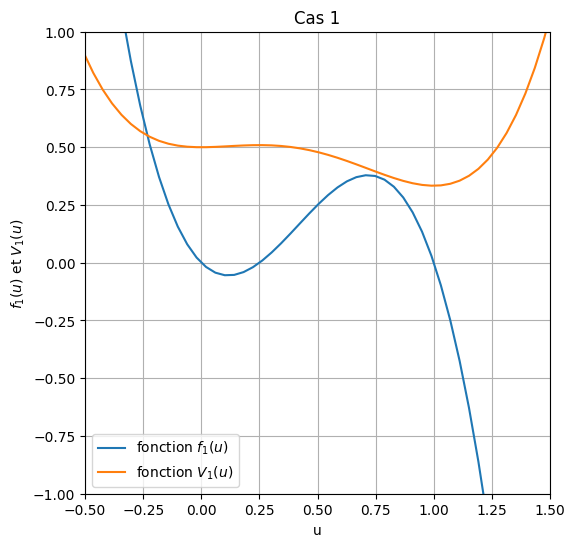

In [26]:
# Import
import matplotlib.pyplot as plt
import numpy as np

# Fonctions
def f1(u):
    return -u + 5 * u**2 - 4*u**3
def V1(u, c):
    return 1/2*u**2-5/3*u**3+u**4+c


# On utilise ici la bibliothèque Numpy pour créer un vecteur. 
# np.linspace(start, stop, num) génère un tableau de nombres équidistants entre start et stop, avec num éléments.
# Ici, start = -2, stop = 2 et num = 100.
u = np.linspace(-2, 2, 100)  

# Graphes
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 6))
ax1.grid(True)
ax1.plot(u, f1(u), label = 'fonction $f_1(u)$')
ax1.plot(u, V1(u,0.5), label = 'fonction $V_1(u)$') # c=1  pour éviter le chevauchement
ax1.set_xlabel('u')
ax1.set_ylabel('$f_1(u)$ et $V_1(u)$')
ax1.set_title('Cas 1')
ax1.axis([-0.5,1.5,-1,1])
ax1.legend()

- **Q.2.** En s'inspirant du TP numérique Euler précédent, résoudre numériquement l'équation $\dot u = f(u)$ avec $f(u)$ défini en (1). Tracer l'évolution de la population $u(t)$  pour chacune des conditions initiales $u(t=0)=u_0$ suivantes : $u_0\in\{-0.5,0,0.24,0.25,0.26,1,1.5\}$ pour $0\le t \le 10$ et $-0,5\le u \le 1,5$.

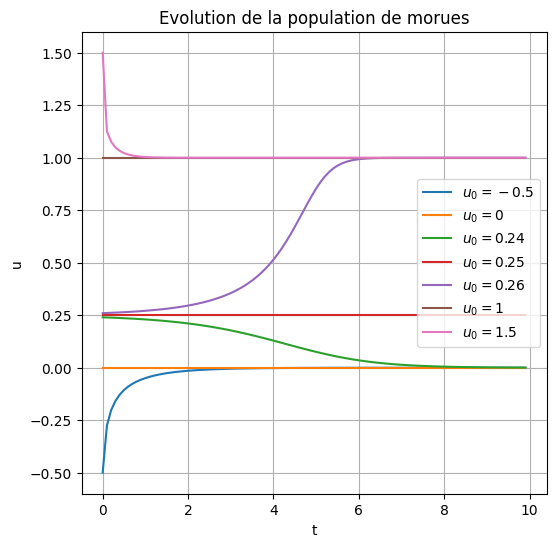

In [29]:
import matplotlib.pyplot as plt

list_u0 = [-0.5, 0, 0.24, 0.25, 0.26, 1, 1.5]

def euler(f, u0, t0, dt):
    N = 100
    t = [t0] * N
    u = [u0] * N
    u[0] = u0
    for k in range(1, N):
        u[k] = u[k - 1] + dt * f(u[k - 1])
        t[k] = t[k - 1] + dt
    return t, u

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(True)

for i in range(len(list_u0)):
    t, u = euler(f1, list_u0[i], 0, 0.1)
    ax.plot(t, u, label=f'$u_0={list_u0[i]}$')
    
ax.set_xlabel('t')
ax.set_ylabel('u')
ax.set_title('Evolution de la population de morues')
ax.legend()
plt.show()

- **Q.3.** Les allures des graphes de ces solutions correspondent-elle à ce à quoi vous pouviez vous attendre ? Commentez

> Il était évident que ces solutions allaient converger ; une population ne peut pas croître indéfiniment.

**Réponse** :

Les solutions qui démarrent sur un point d'équilibre sont constantes, les autres convergent vers les valeurs d'équilibre aux équilibres stables. On peut remarquer que même les solutions qui au départ sont très voisines de la valeur d'équilibre instable, convergent vers une valeur d'équiblibre stable. 

## 2. Modélisation de la population de morue avec prédation

La population de morues $u$ est soumise à une prédation, la pêche par exemple. L'équation différentielle qui régit cette population est :
$$
\begin{equation}
\dot u = g(u)\,,
\quad\text{avec}\quad
g(u) = f(u) - pu
\,,
\end{equation}
$$
où la quantité $p$, strictement positive (et constante dans le temps), représente l'*effort de prédation*. $p$ dépend donc de la quantité de pêche autorisée, et est d'autant plus grand que la pêche est importante. 

Nous allons simuler cette évolution sur 40 ans  : $t = 0$ correspond à l'année $2000$, et $t = 40$ à l'année $2040$, en supposant que la condition initiale est le point d'équilibre stable non nul trouver sans prédation, soit $u_0=1$.

L'expression de la fonction $g$ et d'un potentiel $W$ associé sont donc : 
 $$
g(u) = -(1+p)u + 5u^2 -4u^3
\,,\quad
W(u) = \frac{1+p}{2}u^2 - \frac{5}{3}u^3 +u^4 + C
\,.
 $$


- **Q.1.** Tracer dans un même repère l'allure de la fonction $g$ et du potentiel $W$ associé, pour chacune des valeurs suivantes du paramètre $p$ : $p=0.4$, $p=\frac9{16}= 0.5625$ et $p=0.7.$ 

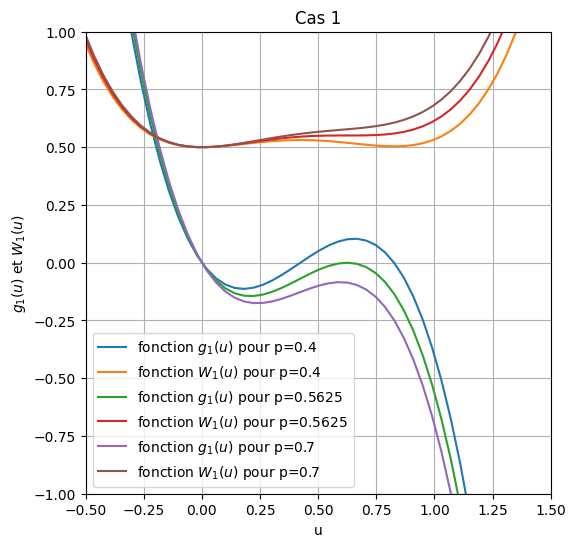

In [50]:
# Import
import matplotlib.pyplot as plt
import numpy as np

ps = [0.4,9/16,0.7]

# Fonctions
def f1(u, p):
    return -(1+p)*u + 5 * u**2 - 4*u**3
def V1(u, c, p):
    return (1+p)/2*u**2-5/3*u**3+u**4+c


# On utilise ici la bibliothèque Numpy pour créer un vecteur. 
# np.linspace(start, stop, num) génère un tableau de nombres équidistants entre start et stop, avec num éléments.
# Ici, start = -2, stop = 2 et num = 100.
u = np.linspace(-2, 2, 100)  

# Graphes
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 6))
ax1.grid(True)

for p in ps:
    ax1.plot(u, f1(u, p), label = f'fonction $g_1(u)$ pour p={p}')
    ax1.plot(u, V1(u,0.5, p), label = f'fonction $W_1(u)$ pour p={p}') # c=1  pour éviter le chevauchementt

ax1.set_xlabel('u')
ax1.set_ylabel('$g_1(u)$ et $W_1(u)$')
ax1.set_title('Cas 1')
ax1.axis([-0.5,1.5,-1,1])
ax1.legend()

- **Q.2.** Lorsque $p=\frac9{16}$, qu'observe-t-on au point $u=\frac 58$? Vérifiez par le calcul cette observation. Ce point est-il un point d'équilibre stable ou instable? 

> On observe que la dérivée de $g$ s'annule en $u=\frac 58$. On peut vérifier que $g\left(\frac 58\right)=0$ et que $g'(u)$ est négatif pour $u<\frac 58$ et positif pour $u>\frac 58$. C'est donc un point d'équilibre instable.


- **Q.3.** Tracer le graphe de la solution de l'équation différentielle pour $p=0,4$; $p=0,56$; $p=0,57$ et $p=0,7$. Comment pouvez-vous interpréter ces graphe ? Que dire de la population de poissons en 2020 ? En 2040 ?

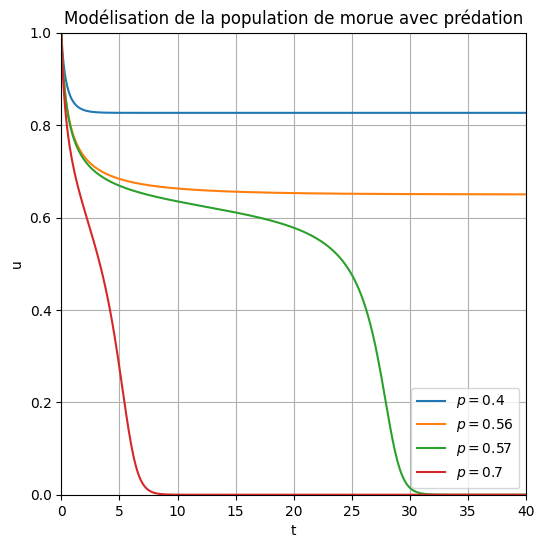

In [49]:
import matplotlib.pyplot as plt

ps=[0.4,0.56,0.57,0.7]
def f1(u, p):
    return -(1+p)*u + 5 * u**2 - 4*u**3

def euler(f, u0, t0, dt, p):
    N = 400
    t = [t0] * N
    u = [u0] * N
    u[0] = u0
    for k in range(1, N):
        u[k] = u[k - 1] + dt * f(u[k - 1], p)
        t[k] = t[k - 1] + dt
    return t, u

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(True)

for p in ps:
    t, u = euler(f1, 1, 0, 0.1, p)
    ax.plot(t, u, label=f'$p={p}$')
    
ax.set_xlabel('t')
ax.set_ylabel('u')
ax.set_title('Modélisation de la population de morue avec prédation')
ax.axis([0,40,0,1])
ax.legend()
plt.show()

- **Q.4** Prenons $p=0.57$. Si le gouvernement interdit la pêche en 2027 au moment où la population doit baisser brutalement, la situation se serait-elle améliorée ? Même question si on avait interdit la pêche en 2028 ?

> La population va disparaître miskina. Il n'y a pas de retour en arrière possible. 